<a href="https://colab.research.google.com/github/mimomaina/machine-learning_002/blob/main/Spotify_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import wordpunct_tokenize, word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load dataset

In [ ]:
df=pd.read_csv('/content/reviews.csv',encoding='latin-1')
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
# Creating a dataframe with review title as the column
spotify = pd. DataFrame(df['Review'])
spotify.head()

,Review
0,"Great music service, the audio is high quality..."
1,Please ignore previous negative rating. This a...
2,"This pop-up ""Get the best Spotify experience o..."
3,Really buggy and terrible to use as of recently
4,Dear Spotify why do I get songs that I didn't ...


# Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


# **Lowercasing**

In [ ]:
spotify['Review']=spotify['Review'].str.lower()
spotify['Review']

,Review
0,"great music service, the audio is high quality..."
1,please ignore previous negative rating. this a...
2,"this pop-up ""get the best spotify experience o..."
3,really buggy and terrible to use as of recently
4,dear spotify why do i get songs that i didn't ...
...,...
61589,even though it was communicated that lyrics fe...
61590,"use to be sooo good back when i had it, and wh..."
61591,this app would be good if not for it taking ov...
61592,the app is good hard to navigate and won't jus...


# **Removing punctuations**

In [ ]:
spotify['Review']=spotify['Review'].str.replace('[^\w\s]','')
spotify['Review']

,Review
0,"great music service, the audio is high quality..."
1,please ignore previous negative rating. this a...
2,"this pop-up ""get the best spotify experience o..."
3,really buggy and terrible to use as of recently
4,dear spotify why do i get songs that i didn't ...
...,...
61589,even though it was communicated that lyrics fe...
61590,"use to be sooo good back when i had it, and wh..."
61591,this app would be good if not for it taking ov...
61592,the app is good hard to navigate and won't jus...


# **Tokenization**

In [ ]:
spotify['Review'] = spotify['Review'].astype(str)
spotify['Review'] = spotify['Review'].apply(lambda x: word_tokenize(x))
spotify.head()

,Review
0,"[great, music, service, ,, the, audio, is, hig..."
1,"[please, ignore, previous, negative, rating, ...."
2,"[this, pop-up, ``, get, the, best, spotify, ex..."
3,"[really, buggy, and, terrible, to, use, as, of..."
4,"[dear, spotify, why, do, i, get, songs, that, ..."


# Stop word **Removal**

In [ ]:
#Removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
spotify['Review'] = spotify['Review'].apply(lambda x: " ".join(x for x in x if x not in stop))
spotify.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review
0,"great music service , audio high quality app e..."
1,please ignore previous negative rating . app s...
2,pop-up `` get best spotify experience android ...
3,really buggy terrible use recently
4,dear spotify get songs n't put playlist ? ? ? ...


# **Lemmetization**

In [ ]:
lemmatizer = WordNetLemmatizer()
spotify['Review'] = spotify['Review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
spotify.head()

,Review
0,"great music service , audio high quality app e..."
1,please ignore previous negative rating . app s...
2,pop-up `` get best spotify experience android ...
3,really buggy terrible use recently
4,dear spotify get song n't put playlist ? ? ? s...


In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

spotify['Review'] = spotify['Review'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.replace('?', '').split()])
)

spotify.head()


,Review
0,"great music service , audio high quality app e..."
1,please ignore previous negative rating . app s...
2,pop-up `` get best spotify experience android ...
3,really buggy terrible use recently
4,dear spotify get song n't put playlist shuffle...


# Feature Extraction


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2),max_features=40000)


In [ ]:
# If your original dataset already contains ratings:
spotify['Rating'] = spotify['Original_Rating_Column']


# 1.Distinguishing words in 1-star vs. 5-star reviews

In [ ]:
spotify['Rating'] = df['Rating']


In [ ]:
tfidf = TfidfVectorizer()  # Initialize the vectorizer
tfidf_matrix = tfidf.fit_transform(spotify['Review'])  # Fit and transform in one step


In [ ]:
tfidf_matrix = tfidf.transform(spotify['Review'])
tfidf_dense = tfidf_matrix.toarray()



In [ ]:
feature_names = tfidf.get_feature_names_out()


In [ ]:
# Add ratings to the TF-IDF matrix
spotify['TF-IDF'] = list(tfidf_dense)

# Filter for 1-star and 5-star reviews
one_star_reviews = spotify[spotify['Rating'] == 1]
five_star_reviews = spotify[spotify['Rating'] == 5]


In [ ]:
import numpy as np

# Compute average TF-IDF scores for 1-star and 5-star reviews
one_star_tfidf = np.mean(np.vstack(one_star_reviews['TF-IDF']), axis=0)
five_star_tfidf = np.mean(np.vstack(five_star_reviews['TF-IDF']), axis=0)


In [ ]:
# Map words to their importance scores
one_star_words = dict(zip(feature_names, one_star_tfidf))
five_star_words = dict(zip(feature_names, five_star_tfidf))


In [ ]:
# Sort by TF-IDF scores
top_one_star_words = sorted(one_star_words.items(), key=lambda x: x[1], reverse=True)[:10]
top_five_star_words = sorted(five_star_words.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top words in 1-star reviews:")
print(top_one_star_words)

print("\nTop words in 5-star reviews:")
print(top_five_star_words)


Top words in 1-star reviews:
[('song', 0.05935243976502278), ('app', 0.050024450798830465), ('play', 0.04380073982773456), ('ad', 0.031147181301053973), ('ca', 0.02983543578315014), ('spotify', 0.028481182514210623), ('music', 0.027267927072651528), ('even', 0.02592180408605434), ('update', 0.025506035579944696), ('playlist', 0.024063295526140185)]

Top words in 5-star reviews:
[('music', 0.08322717265890846), ('app', 0.06087426139242969), ('love', 0.05768485751131287), ('spotify', 0.04710589900783221), ('best', 0.04710263124283627), ('great', 0.04320091937519507), ('good', 0.03605231197851794), ('song', 0.035341925582433584), ('listen', 0.026704575639898975), ('easy', 0.026296742946059295)]


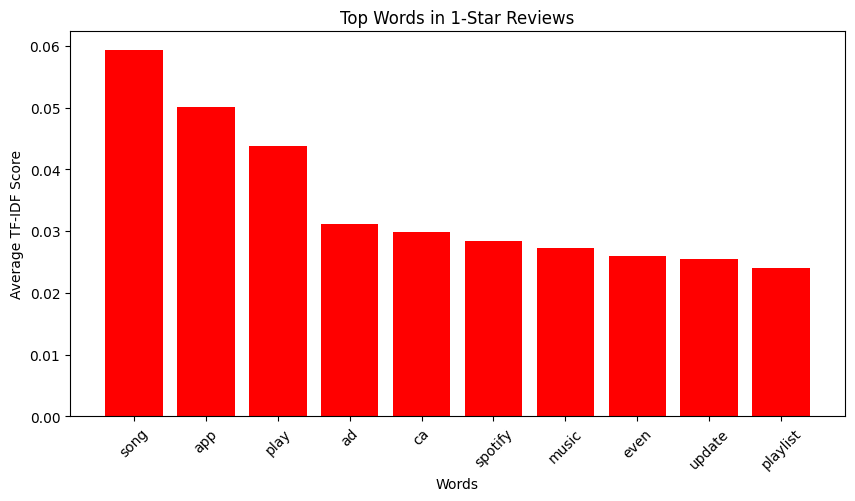

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for visualization
words_1star, scores_1star = zip(*top_one_star_words)
words_5star, scores_5star = zip(*top_five_star_words)

# Plot for 1-star reviews
plt.figure(figsize=(10, 5))
plt.bar(words_1star, scores_1star, color='red')
plt.title("Top Words in 1-Star Reviews")
plt.xlabel("Words")
plt.ylabel("Average TF-IDF Score")
plt.xticks(rotation=45)
plt.show()



From the above barplot we can say that the reasons as to why a 1 star review was given is due to issues in the songs,updates and music, the applicaton itself and its updates and  having too many ads.

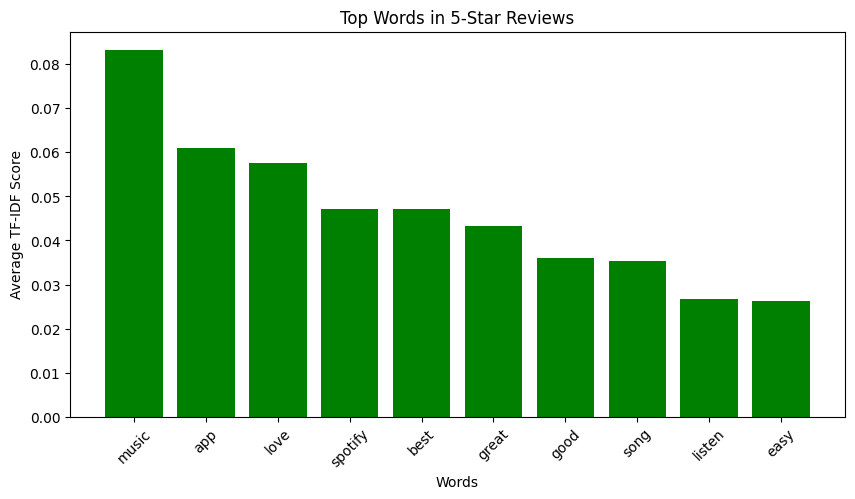

In [ ]:
# Plot for 5-star reviews
plt.figure(figsize=(10, 5))
plt.bar(words_5star, scores_5star, color='green')
plt.title("Top Words in 5-Star Reviews")
plt.xlabel("Words")
plt.ylabel("Average TF-IDF Score")
plt.xticks(rotation=45)
plt.show()

# 2.Sentiment Analysis

In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


In [ ]:
# Apply VADER sentiment analysis
spotify['vader_sentiment'] = spotify['Review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])


In [ ]:
# Categorize sentiment based on the compound score
def sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization
spotify['sentiment_category'] = spotify['vader_sentiment'].apply(sentiment_category)


In [ ]:
# Check the distribution of sentiments
sentiment_counts = spotify['sentiment_category'].value_counts()
print(sentiment_counts)


sentiment_category
Positive    42479
Negative    14136
Neutral      4979
Name: count, dtype: int64


In [ ]:
# Check sentiment vs rating
sentiment_vs_rating = spotify.groupby(['Rating', 'sentiment_category']).size().unstack()
print(sentiment_vs_rating)


sentiment_category  Negative  Neutral  Positive
Rating                                         
1                       8244     2031      7378
2                       2582      729      3807
3                       1734      674      4478
4                        834      537      6471
5                        742     1008     20345


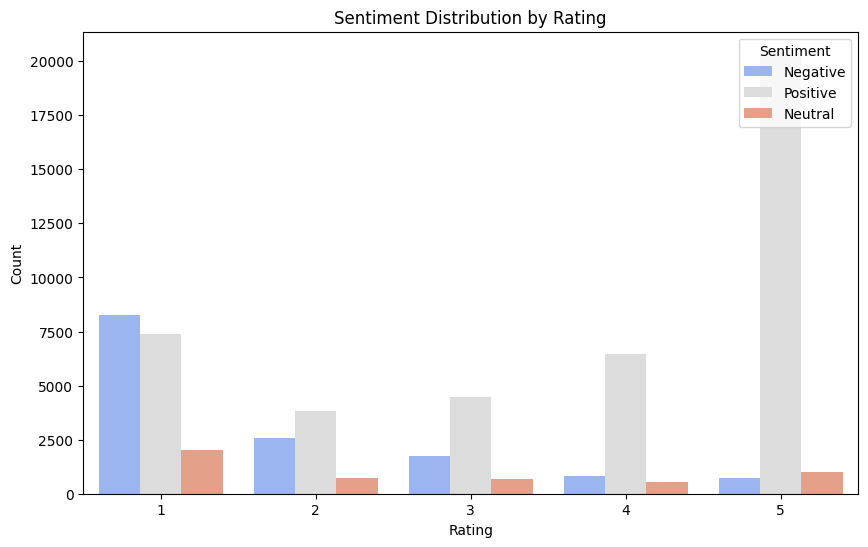

In [ ]:
# Plot sentiment distribution by Rating
plt.figure(figsize=(10, 6))
sns.countplot(data=spotify, x='Rating', hue='sentiment_category', palette='coolwarm')
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.show()


<ipython-input-48-58f2d0ca80fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spotify, x='sentiment_category', palette='coolwarm')


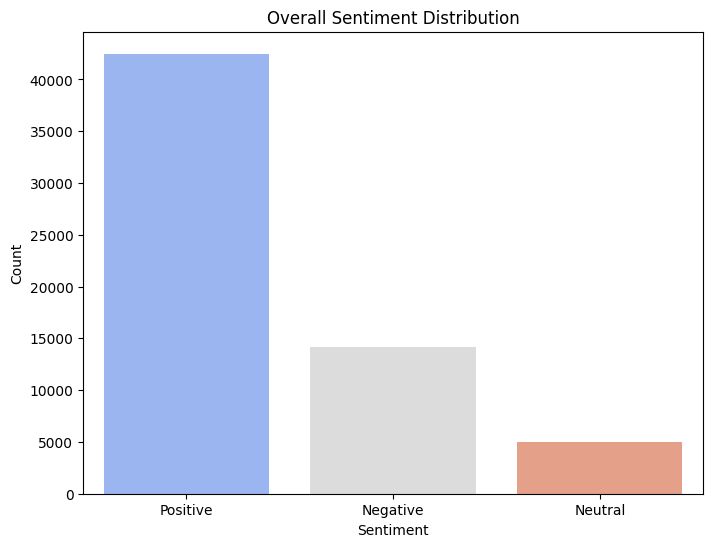

In [ ]:
# Plot the overall sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=spotify, x='sentiment_category', palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


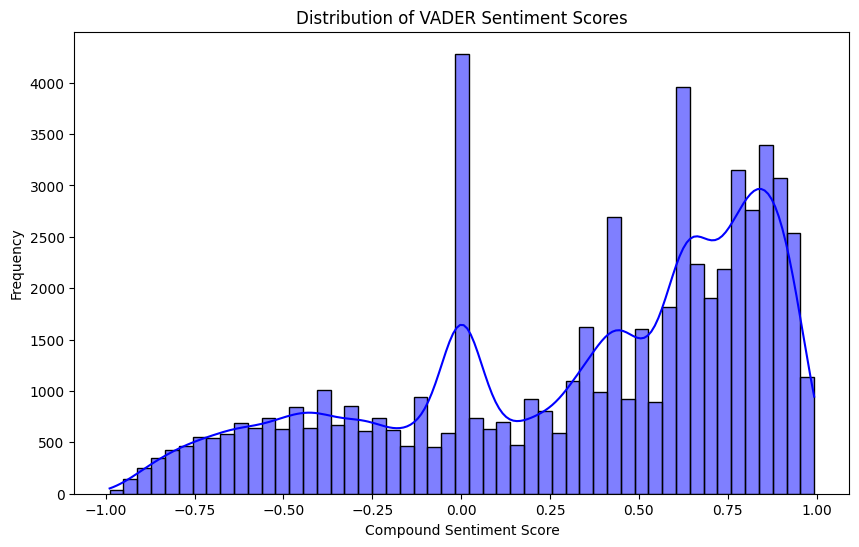

In [ ]:
# Plot distribution of VADER sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['vader_sentiment'], kde=True, color='blue')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


A significant portion of reviews are neutral, as shown by the tall peak around the score of 0.0.Suggesting that many reviews do not express strong emotions or sentiments

<ipython-input-51-664f4a9ea7e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify, x='Rating', y='vader_sentiment', palette='coolwarm')


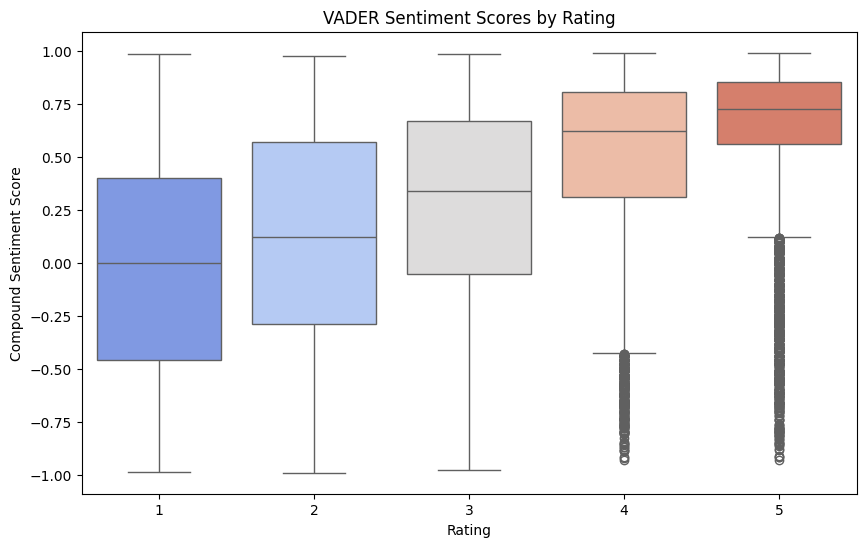

In [ ]:
# Boxplot for sentiment scores by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify, x='Rating', y='vader_sentiment', palette='coolwarm')
plt.title('VADER Sentiment Scores by Rating')
plt.xlabel('Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()


In [ ]:
!pip install wordcloud


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
# Concatenate all the reviews for each sentiment category
positive_reviews = " ".join(spotify[spotify['sentiment_category'] == 'Positive']['Review'])
negative_reviews = " ".join(spotify[spotify['sentiment_category'] == 'Negative']['Review'])
neutral_reviews = " ".join(spotify[spotify['sentiment_category'] == 'Neutral']['Review'])

# Alternatively, if you want the word cloud for all reviews, just join them all
all_reviews = " ".join(spotify['Review'])


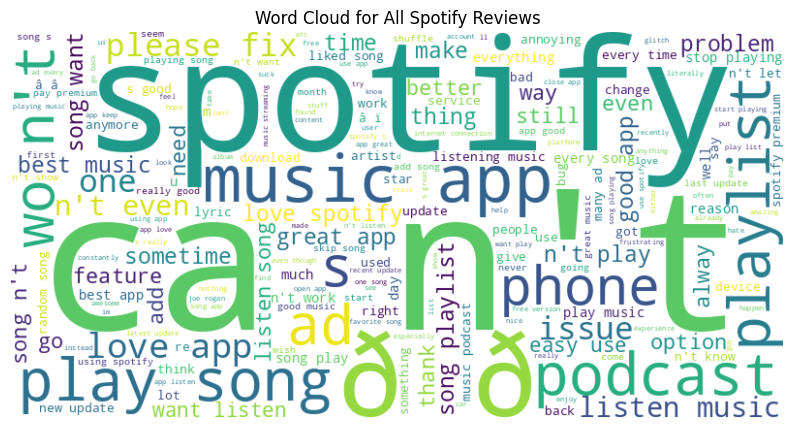

In [ ]:
# Generate the Word Cloud for all reviews
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for All Spotify Reviews')
plt.show()


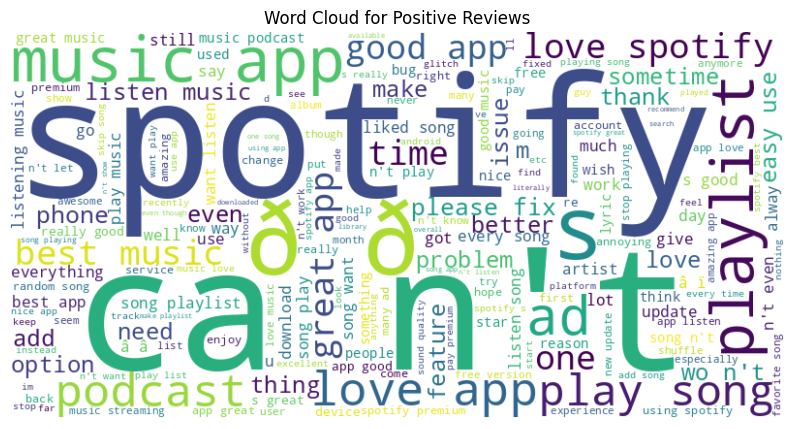

In [ ]:
# Word Cloud for Positive Reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

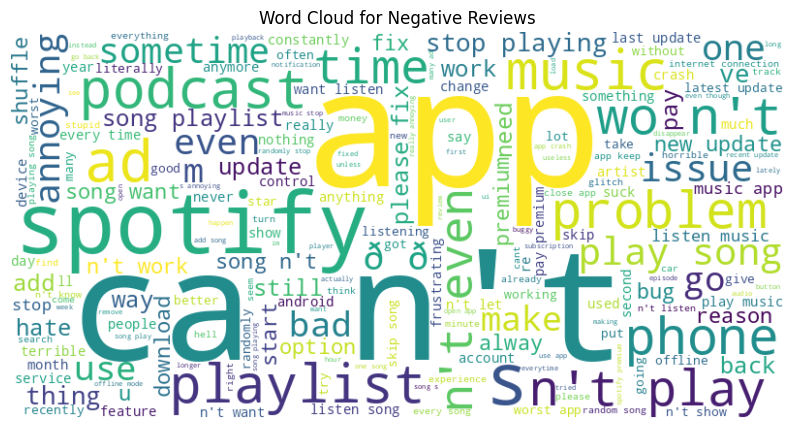

In [ ]:
# Word Cloud for Negative Reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()